In [1]:
import scipy.linalg as la
from scipy.special import factorial
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 
import numpy as np
from helper_functions.grape_functions import *
from main_grape.Grape import Grape
%pylab inline



Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
def coherent_state(beta):
    coeffs = []
    pre_factor = np.exp((-(np.abs(beta))**2)/2)
    for ii in range(mode_state_num):
        coeff = pre_factor * beta**ii /(np.sqrt(factorial(ii)))
        coeffs.append(coeff)
    return coeffs

state_transfer = False
#Defining time scales
total_time = 25.0
steps = 700

#Defining H0
qubit_state_num = 4

alpha = 0.224574
freq_ge = 3.5#GHz
ens = np.array([ 2*np.pi*ii*(freq_ge - 0.5*(ii-1)*alpha) for ii in np.arange(qubit_state_num)])
Q_x   = np.diag(np.sqrt(np.arange(1,qubit_state_num)),1)+np.diag(np.sqrt(np.arange(1,qubit_state_num)),-1)
Q_y   = (0+1j) *(np.diag(np.sqrt(np.arange(1,qubit_state_num)),1)-np.diag(np.sqrt(np.arange(1,qubit_state_num)),-1))
Q_z   = np.diag(np.arange(0,qubit_state_num))
I_q = np.identity(qubit_state_num)
H_q = np.diag(ens)

mode_state_num = 25
qm_g =2*np.pi*0.1
mode_freq = 4.0 #GHz
mode_ens = np.array([ 2*np.pi*ii*(mode_freq) for ii in np.arange(mode_state_num)])
M_x = np.diag(np.sqrt(np.arange(1,mode_state_num)),1)+np.diag(np.sqrt(np.arange(1,mode_state_num)),-1)
M_y = (0+1j) *(np.diag(np.sqrt(np.arange(1,mode_state_num)),1)-np.diag(np.sqrt(np.arange(1,mode_state_num)),-1))
M_z   = np.diag(np.arange(0,mode_state_num))
H_m = np.diag(mode_ens)
I_m = np.identity(mode_state_num)

H0 = np.kron(H_q,I_m) + np.kron(I_q,H_m) +\
        + qm_g*np.kron(Q_x,M_x) 
XI = np.kron(Q_x,I_m)
YI = np.kron(Q_y,I_m)
ZI = np.kron(Q_z,I_m)
IX = np.kron(I_q,M_x)
IY = np.kron(I_q,M_y)
IZ = np.kron(I_q,M_z)

#Defining the coherent state
beta = 3.0
coeffs_1 = coherent_state(beta)
coeffs_2 = coherent_state(- beta)
coeffs_3 = coherent_state((0+1j)*beta)
cat_coeffs = (1/np.sqrt(2)) * np.add(coeffs_1,coeffs_2)
#cat_coeffs = coeffs_2

cat= cat_coeffs
cat=np.append(cat,np.zeros((qubit_state_num-1)*mode_state_num))
print cat

a=0
for k in cat:
    a = a+ np.abs(k)**2
print a



w_c, v_c = la.eig(H0)
dressed=[]
D= True
if D:
    for ii in range (len(v_c)):
        index=np.argmax(np.abs(v_c[:,ii]))
        if index not in dressed:
            dressed.append(index)
        else:
            temp= (np.abs(v_c[:,ii])).tolist()
            while index in dressed:

                temp.remove(max(temp))
                index2= np.argmax(np.array(temp))

                if index2<index:
                            #dressed.append(index2)
                    index=index2
                else:
                            #dressed.append(index2-1)
                    index=index2+1
            dressed.append(index)


#Defining states to include in the drawing of occupation
states_draw_list = range(mode_state_num)
states_draw_names = []
for ii in range (mode_state_num):
    states_draw_names.append('0_'+str(ii))

from helper_functions.grape_functions import get_state_index
g0 = v_c[:,get_state_index(0,dressed)]
if not state_transfer:
    
    if D:
        cat_d = np.zeros(mode_state_num*qubit_state_num)
    
        for ii in range(len(cat)):
            cat_d = cat_d + cat[ii] * v_c[:,get_state_index(ii,dressed)]
    else:
        cat_d = cat
   
    U =  np.outer(cat_d,g0)
#Defining Concerned states (starting states)
else:
    U = cat
psi0=[0]

#Defining states to include in the drawing of occupation
states_draw_list = range(mode_state_num)
states_draw_names = []
for ii in range (mode_state_num):
    states_draw_names.append('g_'+str(ii))


multi_mode = {'dressed':dressed, 'vectors':v_c, 'qnum':qubit_state_num, 'mnum': mode_state_num,\
              'f':freq_ge, 'es':w_c, 'g1':qm_g, 'D':D, 'Interpolation':False, 'Modulation':False}
#Defining control Hs

Hops = [XI,YI,ZI]
Hnames =['xi','yi','zi']

#Defining convergence parameters
max_iterations = 300
decay = max_iterations/2
convergence = {'rate':0.01, 'update_step':10, 'max_iterations':max_iterations,\
               'conv_target':1e-8,'learning_rate_decay':decay}
penalty_coeffs = {'envelope' : 0, 'dc':0, 'dwdt':0,'d2wdt2':0, 'forbidden':0}
#u0 = np.load('cat_beta_3_25.npy')

print dressed


[ 0.01571049  0.          0.09998097  0.          0.25975818  0.
  0.42682624  0.          0.5133335   0.          0.48699092  0.
  0.38148407  0.          0.25449732  0.          0.14784958  0.
  0.07606798  0.          0.03511985  0.          0.01470531  0.          0.0056331
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
Error = 2.54e-03
Total time is 132.752510071


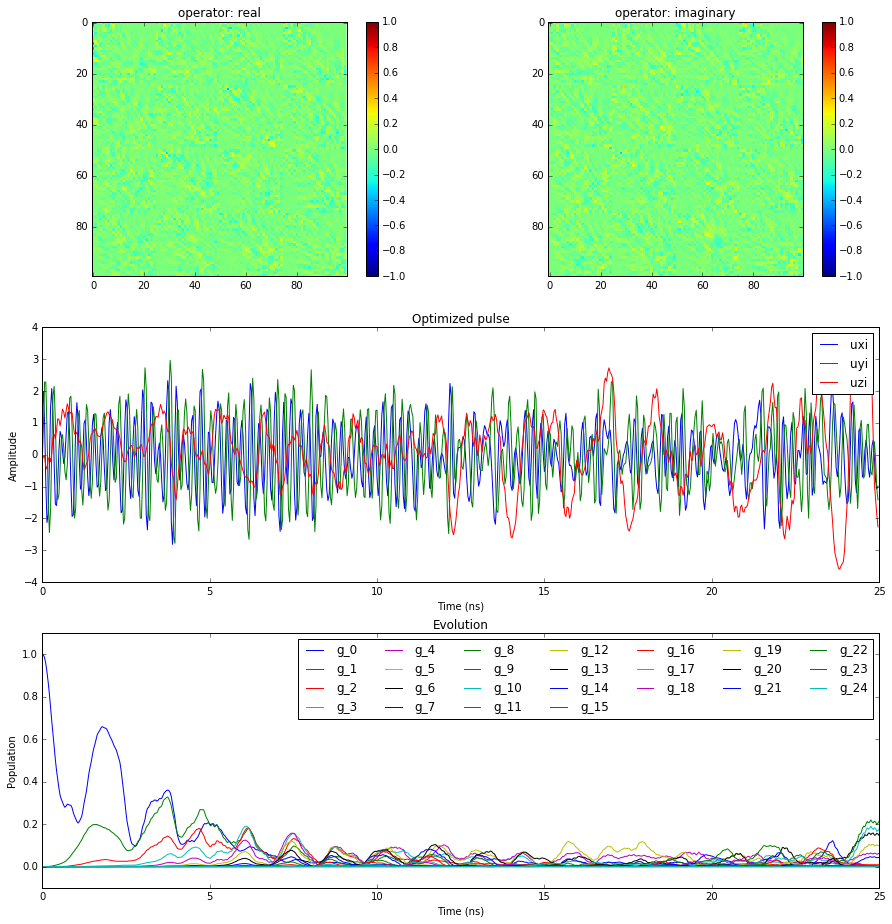

In [3]:
 #Extra options
#reg_coeffs = reg_coeffs,draw = [states_draw_list,states_draw_names] ,forbidden = states_forbidden_list,multi_mode = multi_mode,
#maxA = ops_max_amp,use_gpu = True

uks,U_final = Grape(H0,Hops,Hnames,U,total_time,steps,psi0,convergence=convergence, draw = [states_draw_list,states_draw_names],  
                    state_transfer=state_transfer, penalty_coeffs = penalty_coeffs,
                    show_plots =False, 
       unitary_error = 1e-4, method = 'L-BFGS-B',switch = False)
      
      

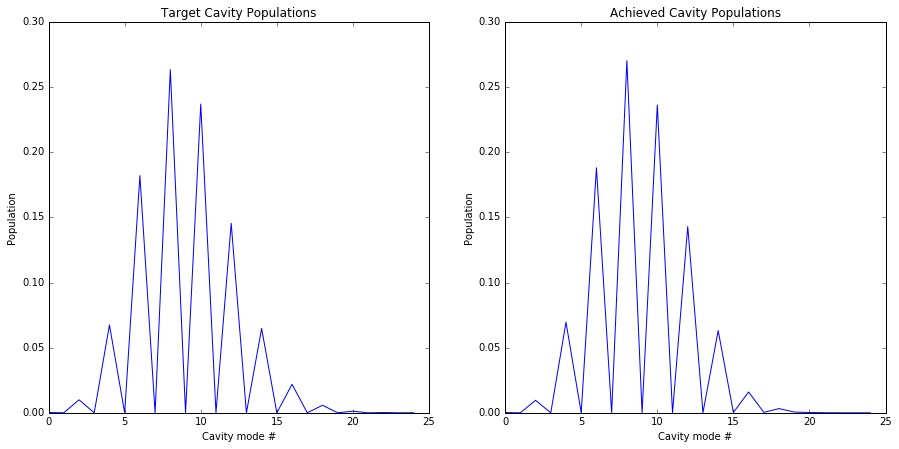

In [4]:
#np.save('cat_2',uks)
#np.save('cat_beta_3_25',uks)
a = np.load('final.npy')
b = np.load('target.npy')
a = a[:qubit_state_num*mode_state_num] + (0+1j) * a[qubit_state_num*mode_state_num:]
b = b[:qubit_state_num*mode_state_num] + (0+1j) * b[qubit_state_num*mode_state_num:]
v_sorted=sort_ev(v_c,dressed)

d= np.dot(np.transpose(v_sorted),a)

target = []
final = []
for ii in range(100):
    #print np.square(np.abs(np.dot(v_c[get_state_index(ii,dressed)],a))),np.square(cat[ii]),np.square(np.abs(d[ii]))
    target.append(np.square(cat[ii]))
    final.append(np.square(np.abs(d[ii])))

plt.figure(figsize=(15,7))
plt.subplot(121)

plt.plot(target[0:mode_state_num])
plt.xlabel('Cavity mode #')
plt.ylabel('Population')
plt.title('Target Cavity Populations')
plt.subplot(122)
plt.plot(final[0:mode_state_num])
plt.xlabel('Cavity mode #')
plt.ylabel('Population')
plt.title('Achieved Cavity Populations')



ERROR! Session/line number was not unique in database. History logging moved to new session 4311


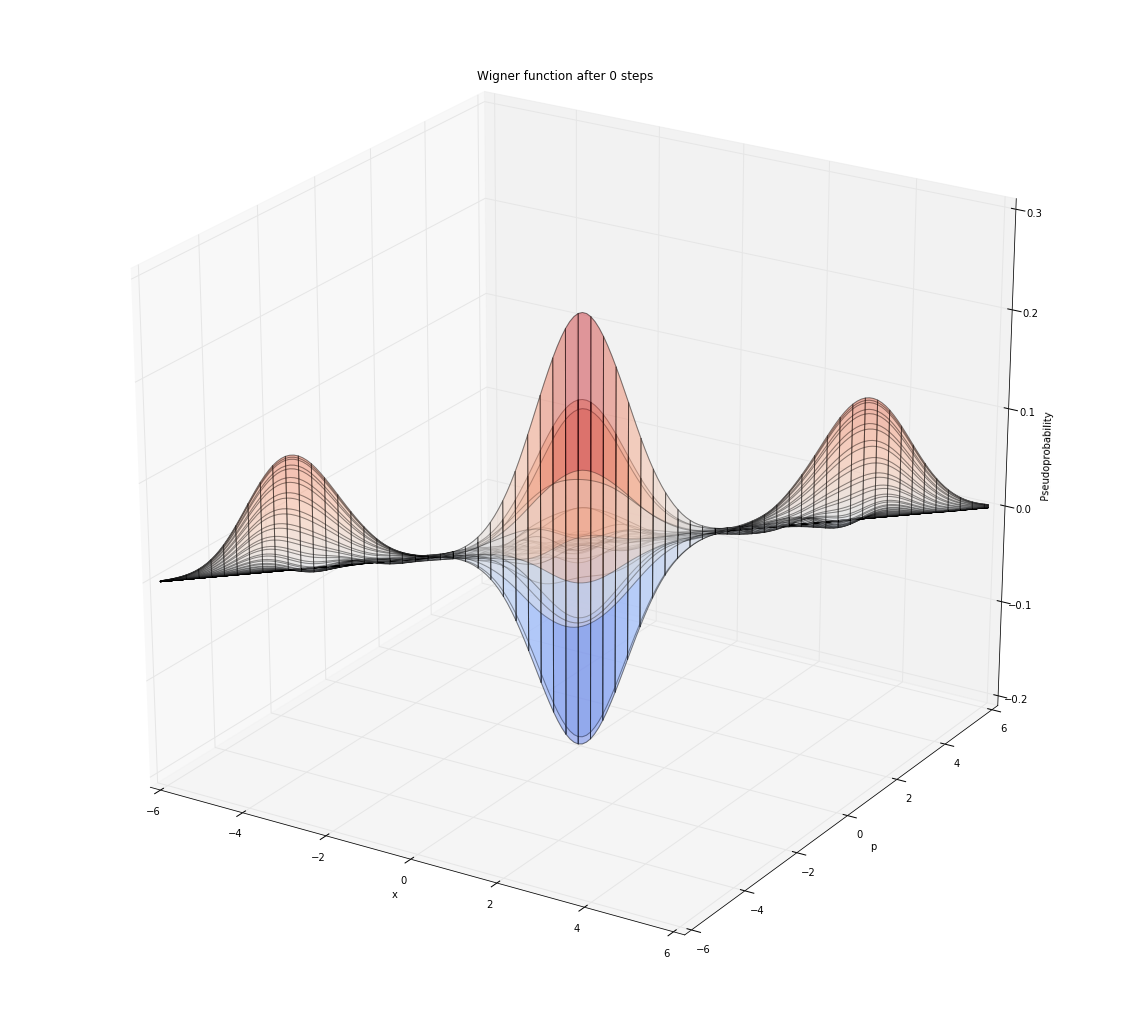

In [90]:
from qutip import *
xvec = np.linspace(-6,6,200)
vecs = (np.transpose(np.load('lol.npy')))
v = np.linspace(-.3, 0.3, 100, endpoint=True)

from mpl_toolkits.mplot3d import Axes3D
for ii in range(1):
    #a = wigner(Qobj(np.abs(vecs[580][:25])),xvec,xvec)
    #fig, axes = plt.subplots(1, 1, figsize=(15,12))
    fig = plt.figure(figsize=(20,18))
    ax = fig.add_subplot(111, projection='3d')
    a = wigner(Qobj(np.abs(vecs[-1][:25])),xvec,xvec)
    ax.view_init(elev=25, azim=-58) 

    ax.plot_surface(xvec, xvec, a,rstride=3, 
                    cstride=3, 
                    alpha=0.3,            # transparency of the surface 
                    cmap=cm.coolwarm)
    ax.distance = 3
    ax.set_xlabel('x')
    ax.set_xlim(-6, 6)
    ax.set_ylabel('p')
    ax.set_ylim(-6, 6)
    ax.set_zlabel('Pseudoprobability')
    ax.set_zlim(-0.2, 0.3)

    ax.set_title('Wigner function after '+str(ii)+' steps', va='bottom')
    #plt.show()
    #fig, axes = plt.subplots(1, 1, figsize=(15,12))
    #cont0 = axes.contourf(xvec, xvec, a,v,cmap=plt.cm.hsv)
    #lbl0 = axes.set_title("After "+str(ii)+" timesteps")
    #cbar = plt.colorbar(cont0)
    #plt.xlabel('x')
    #plt.ylabel('p')
  
    plt.savefig('cat'+str(ii)+'.png',bbox_inches='tight', pad_inches=0)
    
    



#print vecs[-2][:25]


### 